# All code in this notebook is by Anagha Vinayak Kamat ID- 22220809

# IMPORT MODULES

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# DATA PREPARATION

In [2]:
data = pd.read_table('wildfires.txt', delim_whitespace=True)    # used delim_whitespace to remove blank spaces if any exists
data.head()

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0.0,8.06,3.47,1,6,19
1,no,2010,30,61,1.3,8.17,4.03,2,6,13
2,no,2009,26,83,13.1,8.08,3.59,3,6,22
3,no,2017,25,87,2.5,7.18,2.42,4,6,15
4,no,2014,28,77,0.0,14.98,4.63,5,6,18


In [3]:
data.keys()

Index(['fire', 'year', 'temp', 'humidity', 'rainfall', 'drought_code',
       'buildup_index', 'day', 'month', 'wind_speed'],
      dtype='object')

In [4]:
# Convert the yes and no data into binary form

data['fire'] = data['fire'].map({'yes':1, 'no':0})
data['fire'].value_counts()

1    107
0     97
Name: fire, dtype: int64

In [5]:
# divide the data in x and y i.e. input and output dataset

inputs = ['year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']
features = data.loc[:, inputs]
target = data.loc[:, ['fire']]

In [6]:
# split the data into training and testing form

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=3, test_size = 0.33)


In [7]:
# DATA NORMALIZATION

from sklearn import preprocessing

x_train_normalize = preprocessing.normalize(x_train)
x_test_normalize = preprocessing.normalize(x_test)
y_train_normalize = preprocessing.normalize(y_train)
y_test_normalize = preprocessing.normalize(y_test)


# ALGORITHM CONSTRUCTION

In [8]:
# define activation function 

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Create derivative of the activation function to obtain the gradient descent
def der_sigmoid(x):
    return x * (1 - x)

# DEFINE ERROR AND ACCURACY

In [9]:
def mse(y_true,y_pred):
    return 0.5*((y_pred-y_true)**2).mean()

def accuracy(y_true, y_pred):
    error = mse(y_true, y_pred)
    return 1 - (error/len(y_pred))

# PERCEPTRON CONSTRUCTION

In [10]:
# create a function predict that'll predict the accuracy and error of the perceptron model


def predict(x,y):
    for i in range(1,1000):                                 # make up to 1000 iterations for the model to give final output
        
        '''Assign the initial inputs, outputs, learning rate, bias and randomly generate initial weights'''
        
        inputs = 9
        outputs = 1
        lr = 0.01
        bias = 0.5
        w1 = np.random.rand(9,1)
        w2 = np.random.rand(1,9)
        
        '''above we kep weights as (9,1) first because we have 9 inputs hence it'll assign 9 weights to each input. Later, 
        for second weight, we keep the matrix shape as (1,9) to match the shape of hidden layer formed and input for 
        obtaining the dot product '''
        
        for idx,input in enumerate(x):                       # iterate through the each and every column and row of the data
            h1 = np.dot(input,w1) + bias                     # perform dot product of the input data and the weights
            h1o = sigmoid(h1)                       # we apply sigmoid activation function to obtain the output of hidden layer
            y1 = np.dot(h1o,w2) + bias              # now perform the dot product operation on hidden layers output and weights
            y1o = sigmoid(y1)                                # apply sigmoid activation function and obtain the main output
            error = mse(x, y1o)                              # calculate the error in the actual output and predicted output
            w1 = w1 - lr*der_sigmoid(error)                  # update weights everytime for back propagation
            w2 = w2 - lr*der_sigmoid(error)                  
            bias = bias - lr*der_sigmoid(error)              # update bias for back propagation
            acc = accuracy(y, y1o)
    return error, acc

In [11]:
error1, acc1 = predict(x_test_normalize, y_test_normalize)
error1, acc1

(0.18088673553685602, 0.9850755625940095)

In [12]:
# initialize empty lists to store the outputs later

epochs = []
accu_list = []
error_list = []

# loop 5 times to obtain a range of outputs five times
for i in range(1,6):
    
    epochs.append(i)              # store the array of number of times the loop has run for graphical comparison later on
    
    # split the data into training and testing form

    from sklearn.model_selection import train_test_split
    
    # repeat the above steps again to obtain variations in data and hence variations in output as well
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=4, test_size = 0.33)    
    
    # normalize the data
    
    from sklearn import preprocessing
    x_train_normalize = preprocessing.normalize(x_train)
    x_test_normalize = preprocessing.normalize(x_test)
    y_train_normalize = preprocessing.normalize(y_train)
    y_test_normalize = preprocessing.normalize(y_test)
    
    # store the error and accuracy obtained after each prediction 
    
    err, accu = predict(x_test_normalize, y_test_normalize)        # store the accuracy and error of the model 
    print(err, accu)
    accu_list.append(accu)                                         # append the list of all accuracies in the accu_list 
    error_list.append(err)                                         # append the list of all error in the error_list

0.21027118258099708 0.9856416917372105
0.1870296833913299 0.9859550778430017
0.18904573890526957 0.9858562107354709
0.1990779588457184 0.9858596710287056
0.19384360492085687 0.985862186088468


# VISUALIZING THE OUTPUT DATA USING MY ALGORITHM

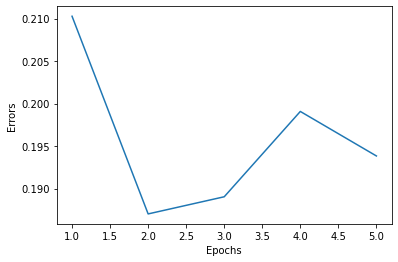

In [13]:
# Visualizing the errors increment or decrement in every 5 iterations 

plt.plot(epochs,error_list)
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

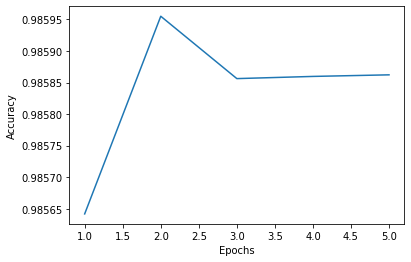

In [14]:
# Visualizing the accuracy increment or decrement in every 5 iterations 

plt.plot(epochs,accu_list)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# DATA VISUALIZATION OF OUTPUT USING PRE_BUILT ALGORITHMS

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
mlp = []
epochs_sci = []

clf = MLPClassifier(random_state=3, hidden_layer_sizes=200, max_iter=1000)

for i in range(1,6):
    epochs_sci.append(i)
    clf.fit(x_test_normalize, y_test_normalize)
    mlp.append(clf.score(x_test_normalize, y_test_normalize))

print(mlp)
print(epochs_sci)

C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multil

[0.9264705882352942, 0.9264705882352942, 0.9264705882352942, 0.9264705882352942, 0.9264705882352942]
[1, 2, 3, 4, 5]


C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


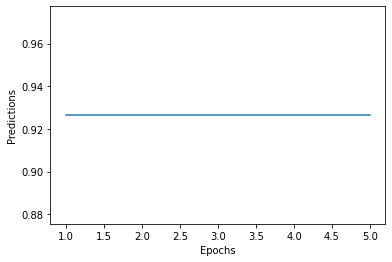

In [16]:
plt.plot(epochs_sci,mlp)
plt.xlabel('Epochs')
plt.ylabel('Predictions')
plt.show()

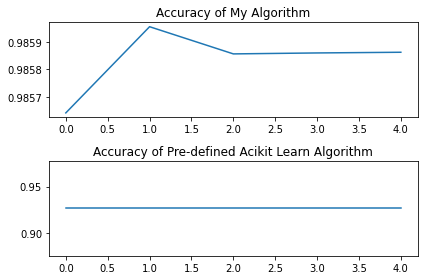

In [17]:
# Comapring the Accuracy of my algorithm against pre-existing scikit library algorithm with the help of matplotlib subplots

x = epochs
y1 = accu_list
y2 = mlp
ax1=plt.subplot(211)
ax1.set_title('Accuracy of My Algorithm')
plt.plot(y1)
ax2=plt.subplot(212)
ax2.set_title('Accuracy of Pre-defined Acikit Learn Algorithm')
plt.plot(y2)
plt.tight_layout()

In [18]:
# initialize empty lists to store the outputs later

epochs = []
accu_list = []
error_list = []

# loop 5 times to obtain a range of outputs five times
for i in range(1,6):
    
    epochs.append(i)              # store the array of number of times the loop has run for graphical comparison later on
    
    # split the data into training and testing form

    from sklearn.model_selection import train_test_split
    
    # repeat the above steps again to obtain variations in data and hence variations in output as well
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=4, test_size = 0.33)    
    
    # normalize the data
    
    from sklearn import preprocessing
    x_train_normalize = preprocessing.normalize(x_train)
    x_test_normalize = preprocessing.normalize(x_test)
    y_train_normalize = preprocessing.normalize(y_train)
    y_test_normalize = preprocessing.normalize(y_test)
    
    # store the error and accuracy obtained after each prediction 
    
    err, accu = predict(x_train_normalize, y_train_normalize)        # store the accuracy and error of the model 
    print(err, accu)
    accu_list.append(accu)                                         # append the list of all accuracies in the accu_list 
    error_list.append(err)                                         # append the list of all error in the error_list

0.16606263181506392 0.9854444566797068
0.1695682841231485 0.9852495834344515
0.17367526272176761 0.9853311467298241
0.1739368931117986 0.9853353875927119
0.1646355681294385 0.9854354951498445


In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
mlp = []
epochs_sci = []

clf = MLPClassifier(random_state=3, hidden_layer_sizes=200, max_iter=1000)

for i in range(1,6):
    epochs_sci.append(i)
    clf.fit(x_test_normalize, y_test_normalize)
    mlp.append(clf.score(x_test_normalize, y_test_normalize))

print(mlp)
print(epochs_sci)

C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multil

[0.9264705882352942, 0.9264705882352942, 0.9264705882352942, 0.9264705882352942, 0.9264705882352942]
[1, 2, 3, 4, 5]


C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
# initialize empty lists to store the outputs later

epochs = []
accu_list = []
error_list = []

# loop 5 times to obtain a range of outputs five times
for i in range(1,6):
    
    epochs.append(i)              # store the array of number of times the loop has run for graphical comparison later on
    
    # split the data into training and testing form

    from sklearn.model_selection import train_test_split
    
    # repeat the above steps again to obtain variations in data and hence variations in output as well
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=7, test_size = 0.33)    
    
    # normalize the data
    
    from sklearn import preprocessing
    x_train_normalize = preprocessing.normalize(x_train)
    x_test_normalize = preprocessing.normalize(x_test)
    y_train_normalize = preprocessing.normalize(y_train)
    y_test_normalize = preprocessing.normalize(y_test)
    
    # store the error and accuracy obtained after each prediction 
    
    err, accu = predict(x_test_normalize, y_test_normalize)        # store the accuracy and error of the model 
    print(err, accu)
    accu_list.append(accu)                                         # append the list of all accuracies in the accu_list 
    error_list.append(err)                                         # append the list of all error in the error_list

0.1947084734119823 0.9860475495162215
0.17183447422408063 0.9863438292759108
0.1957308332280194 0.9861428099943274
0.19367348607550064 0.9862049026757493
0.18047733455596368 0.9863745418245011


In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
mlp = []
epochs_sci = []

clf = MLPClassifier(random_state=7, hidden_layer_sizes=200, max_iter=1000)

for i in range(1,6):
    epochs_sci.append(i)
    clf.fit(x_test_normalize, y_test_normalize)
    mlp.append(clf.score(x_test_normalize, y_test_normalize))

print(mlp)
print(epochs_sci)

C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anagh\AppData\Local\Programs\Python\Pyth

[0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706]
[1, 2, 3, 4, 5]


In [22]:
# initialize empty lists to store the outputs later

epochs = []
accu_list = []
error_list = []

# loop 5 times to obtain a range of outputs five times
for i in range(1,6):
    
    epochs.append(i)              # store the array of number of times the loop has run for graphical comparison later on
    
    # split the data into training and testing form

    from sklearn.model_selection import train_test_split
    
    # repeat the above steps again to obtain variations in data and hence variations in output as well
    
    x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=2, test_size = 0.33)    
    
    # normalize the data
    
    from sklearn import preprocessing
    x_train_normalize = preprocessing.normalize(x_train)
    x_test_normalize = preprocessing.normalize(x_test)
    y_train_normalize = preprocessing.normalize(y_train)
    y_test_normalize = preprocessing.normalize(y_test)
    
    # store the error and accuracy obtained after each prediction 
    
    err, accu = predict(x_train_normalize, y_train_normalize)        # store the accuracy and error of the model 
    print(err, accu)
    accu_list.append(accu)                                         # append the list of all accuracies in the accu_list 
    error_list.append(err)                                         # append the list of all error in the error_list

0.1702755571219741 0.9853423877636865
0.16189972210056464 0.9854581655646429
0.1668237362933423 0.9851589114942148
0.15768584186983212 0.9856097376204617
0.1726524237444778 0.9851864427017993


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
mlp = []
epochs_sci = []

clf = MLPClassifier(random_state=2, hidden_layer_sizes=200, max_iter=1000)

for i in range(1,6):
    epochs_sci.append(i)
    clf.fit(x_test_normalize, y_test_normalize)
    mlp.append(clf.score(x_test_normalize, y_test_normalize))

print(mlp)
print(epochs_sci)

C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multil

[0.9117647058823529, 0.9117647058823529, 0.9117647058823529, 0.9117647058823529, 0.9117647058823529]
[1, 2, 3, 4, 5]


C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
mlp = []
epochs_sci = []

clf = MLPClassifier(random_state=7, hidden_layer_sizes=200, max_iter=1000)

for i in range(1,6):
    epochs_sci.append(i)
    clf.fit(x_test_normalize, y_test_normalize)
    mlp.append(clf.score(x_test_normalize, y_test_normalize))

print(mlp)
print(epochs_sci)

C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multil

[0.9117647058823529, 0.9117647058823529, 0.9117647058823529, 0.9117647058823529, 0.9117647058823529]
[1, 2, 3, 4, 5]


C:\Users\anagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
